In [22]:
# Importing the required libraries
import sklearn as sklearn
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset

In [23]:
import plotly.express as px
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import pickle

In [24]:
df = pd.read_csv('playerAllInfo_aftermissingvales_no_normalization_4.csv')
df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,RM,RS,RW,RWB,ST,Position,Position-DEF,Position-FWD,Position-GK,Position-MID
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000,565000,2228,...,89,92,91,66,92,FWD,0,1,0,0
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000000,565000,2154,...,90,88,91,62,88,MID,0,0,0,1
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000,280000,2100,...,87,84,89,64,84,MID,0,0,0,1
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000,510000,2291,...,85,88,87,68,88,FWD,0,1,0,0
4,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000,230000,1493,...,60,58,59,58,58,GK,0,0,1,0


In [25]:
# To identify the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 74 columns):
ID                    17981 non-null int64
Name                  17981 non-null object
Age                   17981 non-null int64
Nationality           17981 non-null object
Overall               17981 non-null int64
Potential             17981 non-null int64
Club                  17981 non-null object
Value                 17981 non-null int64
Wage                  17981 non-null int64
Special               17981 non-null int64
Acceleration          17981 non-null int64
Aggression            17981 non-null int64
Agility               17981 non-null int64
Balance               17981 non-null int64
Ball_control          17981 non-null int64
Composure             17981 non-null int64
Crossing              17981 non-null int64
Curve                 17981 non-null int64
Dribbling             17981 non-null int64
Finishing             17981 non-null int64
Free_kick_accuracy    17981 

In [26]:
# Getting the number of instances and features
df.shape

(17981, 74)

In [27]:
# Getting the dimensions of the data frame
df.ndim

2

In [28]:
df.describe()

,ID,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,...,RF,RM,RS,RW,RWB,ST,Position-DEF,Position-FWD,Position-GK,Position-MID
count,17981.000000,17981.000000,17981.000000,17981.000000,1.798100e+04,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,...,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,207658.710138,25.144541,66.247984,71.190813,2.385390e+06,11546.966242,1594.095100,103.445526,77.620711,98.149880,...,59.026639,60.051221,58.181024,59.318725,57.732718,58.181024,0.302542,0.138035,0.112841,0.446583
std,32291.667313,4.614272,6.987965,6.102199,5.353970e+06,23080.000139,272.151435,984.876244,768.805831,909.694714,...,9.350112,8.805897,8.648081,9.398922,8.612042,8.648081,0.459371,0.344946,0.316408,0.497152
min,16.000000,16.000000,46.000000,46.000000,0.000000e+00,0.000000,728.000000,11.000000,11.000000,14.000000,...,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,192622.000000,21.000000,62.000000,67.000000,3.000000e+05,2000.000000,1449.000000,56.000000,43.000000,55.000000,...,54.000000,55.000000,53.000000,54.000000,52.000000,53.000000,0.000000,0.000000,0.000000,0.000000
50%,214057.000000,25.000000,66.000000,71.000000,6.750000e+05,4000.000000,1633.000000,67.000000,59.000000,65.000000,...,59.000000,60.000000,58.000000,59.000000,58.000000,58.000000,0.000000,0.000000,0.000000,0.000000
75%,231448.000000,28.000000,71.000000,75.000000,2.100000e+06,12000.000000,1786.000000,75.000000,69.000000,74.000000,...,65.000000,66.000000,64.000000,66.000000,64.000000,64.000000,1.000000,0.000000,0.000000,1.000000
max,241219.000000,47.000000,94.000000,94.000000,1.230000e+08,565000.000000,2291.000000,33270.000000,43495.000000,30164.000000,...,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
##Creating new dataframe having only required columns
df_req = df[['Overall', 'Potential','Value']]
df_req.head()

,Overall,Potential,Value
0,94,94,95500000
1,93,93,105000000
2,92,94,123000000
3,92,92,97000000
4,92,92,61000000


### Predicting the Wage using Linear Regression

In [30]:
X= df_req

##X= df.drop(['ID','Name','Wage', 'Nationality','Position','Club'], axis=1) ##Independent Variable
y= df['Wage'] ##Class or dependent variable

In [31]:
y.head()

0    565000
1    565000
2    280000
3    510000
4    230000
Name: Wage, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

from sklearn import metrics 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.20)

In [37]:
##initiate the model
model= LinearRegression()
##Fiting the model
model_fit= model.fit(X_train, y_train)

In [38]:
##Testing the model
test_predict = model_fit.predict(X_test)

In [39]:
##Root Mean Square error(RMSE)
print('Root Mean squared error RMSE: ' +str(np.sqrt(metrics.mean_squared_error(y_test, test_predict))))

Root Mean squared error RMSE: 11209.539216515175


In [40]:
from sklearn.metrics import r2_score
score = r2_score(y_test, test_predict)
print("R2 SCORE ON TEST DATA: {}".format(score))

R2 SCORE ON TEST DATA: 0.7116537094550033


### Predicting and Test evaluating the Wage using RandomForest


In [34]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor(n_estimators = 500, random_state = 0)
model_fit_RF= modelRF.fit(X_train, y_train)
##Testing the model
test_predict_RF = model_fit_RF.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, test_predict_RF))
print("RMSE: %f" % (rmse))

RMSE: 11416.643615


In [36]:
from sklearn.metrics import r2_score
score = r2_score(y_test, test_predict_RF)
print("R2 SCORE ON TEST DATA: {}".format(score))

R2 SCORE ON TEST DATA: 0.7009004664103766


In [75]:
# Saving model to disk
##pickle.dump(modelRF, open('model_RF.pkl','wb'))

In [76]:
# Loading model to compare the results
##model = pickle.load(open('model_RF.pkl','rb'))
##print(model.predict([[85, 82, 22000000]]))

[94040.]


### Predicting using XGBoost

In [41]:
import xgboost
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgbreg = xgboost.XGBRegressor(nthreads=-1) 

In [42]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [45]:
random_search=RandomizedSearchCV(xgbreg,params,n_iter=10,n_jobs=-1,cv=10,verbose=3)

In [46]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


In [47]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.7s finished


[11:33:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Time taken: 0 hours 0 minutes and 16.86 seconds.


In [48]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8729940430674914,
       gamma=5.3742382843959415, importance_type='gain',
       learning_rate=0.33238702603934533, max_delta_step=0, max_depth=6,
       min_child_weight=36.86440238750611, missing=None, n_estimators=18,
       n_jobs=1, nthread=None, nthreads=-1, objective='reg:linear',
       random_state=0, reg_alpha=77.50839220448292, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=None,
       subsample=0.9815950743972734, verbosity=1)

In [49]:
modelXGB=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8729940430674914,
       gamma=5.3742382843959415, importance_type='gain',
       learning_rate=0.33238702603934533, max_delta_step=0, max_depth=6,
       min_child_weight=36.86440238750611, missing=None, n_estimators=18,
       n_jobs=1, nthread=None, nthreads=-1, objective='reg:linear',
       random_state=0, reg_alpha=77.50839220448292, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=None,
       subsample=0.9815950743972734, verbosity=1)

In [50]:
modelXGB.fit(X_train,y_train)
test_predict_XGB = modelXGB.predict(X_test)
# Predict (after fitting GridSearchCV is an estimator with best parameters)
y_pred = modelXGB.predict(X_test)
 
# Score
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("R2 SCORE ON TEST DATA: {}".format(score))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[11:33:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 SCORE ON TEST DATA: 0.7338511164484186


In [51]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, test_predict_XGB))
print("RMSE: %f" % (rmse))

RMSE: 10769.434536


### Predicting with H2o.ai using GLM

In [2]:
### h2o AutoML
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.automl import H2OAutoML


In [3]:
# Initialize
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,1 hour 27 mins
H2O cluster timezone:,Europe/Berlin
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.5
H2O cluster version age:,4 months and 16 days !!!
H2O cluster name:,H2O_from_python_A549773_cqbxpm
H2O cluster total nodes:,1
H2O cluster free memory:,6.189 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [4]:
##Data importing in H2o.ai
players_data = h2o.import_file('playerAllInfo_aftermissingvales_no_normalization_4.csv')
players_data.head(5)# The default head() command displays the first 10 rows.

Parse progress: |█████████████████████████████████████████████████████████| 100%


ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball_control,Composure,Crossing,Curve,Dribbling,Finishing,Free_kick_accuracy,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,Heading_accuracy,Interceptions,Jumping,Long_passing,Long_shots,Marking,Penalties,Positioning,Reactions,Short_passing,Shot_power,Sliding_tackle,Sprint_speed,Stamina,Standing_tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position,Position-DEF,Position-FWD,Position-GK,Position-MID
20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,9.55e+07,565000,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89,53,62,91,82,89,61,53,82,62,91,89,92,91,66,89,61,82,62,91,89,92,91,66,92,FWD,0,1,0,0
158023,L. Messi,30,Argentina,93,93,FC Barcelona,1.05e+08,565000,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92,45,59,92,84,92,57,45,84,59,92,90,88,91,62,92,57,84,59,92,90,88,91,62,88,MID,0,0,0,1
190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,1.23e+08,280000,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88,46,59,88,79,88,59,46,79,59,88,87,84,89,64,88,59,79,59,88,87,84,89,64,84,MID,0,0,0,1
176580,L. SuÃ¡rez,30,Uruguay,92,92,FC Barcelona,9.7e+07,510000,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87,58,65,88,80,87,64,58,80,65,88,85,88,87,68,87,64,80,65,88,85,88,87,68,88,FWD,0,1,0,0
167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,6.1e+07,230000,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,59,56,57,59,59,59,57,56,59,57,59,60,58,59,58,59,57,59,57,59,60,58,59,58,58,GK,0,0,1,0


In [5]:
players_data.describe()

Rows:17981
Cols:74




,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball_control,Composure,Crossing,Curve,Dribbling,Finishing,Free_kick_accuracy,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,Heading_accuracy,Interceptions,Jumping,Long_passing,Long_shots,Marking,Penalties,Positioning,Reactions,Short_passing,Shot_power,Sliding_tackle,Sprint_speed,Stamina,Standing_tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position,Position-DEF,Position-FWD,Position-GK,Position-MID
type,int,enum,int,enum,int,int,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum,int,int,int,int
mins,16.0,,16.0,,46.0,46.0,,0.0,0.0,728.0,11.0,11.0,14.0,11.0,8.0,5.0,5.0,6.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,13.0,7.0,3.0,4.0,5.0,2.0,28.0,10.0,3.0,4.0,11.0,12.0,4.0,12.0,10.0,4.0,27.0,25.0,26.0,27.0,30.0,27.0,30.0,25.0,30.0,26.0,27.0,28.0,31.0,26.0,31.0,27.0,30.0,30.0,26.0,27.0,28.0,31.0,26.0,31.0,31.0,,0.0,0.0,0.0,0.0
mean,207658.71013847954,,25.144541460430457,,66.24798398309326,71.19081252433124,,2385389.577887771,11546.966242144486,1594.0951003837383,103.44552583282355,77.62071075023636,98.1498804293421,86.61776319448306,121.43846282186753,103.76575273900227,86.55224959679661,62.608197541849734,107.08670263055447,93.33991435404035,62.11278571825817,31.916689839274778,29.67410043935265,26.37283799566209,29.03514821200156,32.95222735109283,86.8852677826595,91.10600077859966,104.53929147433401,91.56059173572103,73.8389967187587,112.7223180023358,62.449696902285744,82.64128802624994,121.6392859129081,115.29681330293084,83.04666036371725,89.64067626939548,119.03470329792562,123.16628663589344,109.44958567376673,116.03998665257772,91.19503920805295,54.64345698237027,59.223346866136474,55.60119014515322,56.88048495634279,59.02663923029865,58.56248262054391,59.223346866136474,56.98198097992325,55.60119014515322,58.56248262054391,56.88048495634279,59.02663923029865,60.05122073299594,58.181024414659916,59.31872532117235,57.73271786886158,59.223346866136474,56.98198097992325,58.56248262054391,56.88048495634279,59.02663923029865,60.05122073299594,58.181024414659916,59.31872532117235,57.73271786886158,58.181024414659916,,0.3025415716589734,0.1380345920694066,0.11284133251765753,0.4465825037539625
maxs,241219.0,,47.0,,94.0,94.0,,123000000.0,565000.0,2291.0,33270.0,43495.0,30164.0,31472.0,43510.0,27150.0,27150.0,43496.0,28491.0,43491.0,28185.0,29618.0,28522.0,26665.0,25965.0,31444.0,31048.0,43790.0,29252.0,29952.0,43488.0,43670.0,25689.0,43741.0,27760.0,28856.0,29677.0,43737.0,32905.0,43798.0,43509.0,31868.0,28216.0,43494.0,92.0,87.0,85.0,92.0,87.0,92.0,84.0,87.0,87.0,85.0,92.0,90.0,92.0,91.0,84.0,92.0,84.0,87.0,85.0,92.0,90.0,92.0,91.0,84.0,92.0,,1.0,1.0,1.0,1.0
sigma,32291.667312905094,,4.614272345005096,,6.987965339747319,6.102199325567414,,5353969.970368193,23080.000138571675,272.1514351168672,984.876243725905,768.8058311204538,909.6947144369593,751.2868528432301,1233.6191887922987,1026.4270128190485,910.7003168350772,624.1439983139712,1107.956528108144,1068.9334866643094,648.840778465143,619.4874741722883,567.4099560181012,477.594972966875,536.8020147050989,659.0120204106972,900.6816744333346,1136.1777125239607,1010.2517123066946,936.9661589672247,804.4573591264469,1387.2033748717217,530.2139461431553,928.7503251273919,1159.2012397118642,1154.4182861822865,809.9714636705544,1073.9738100029572,1183.4641141001748,1260.6343218279344,1286.0938146520161,1146.3461342078206,943.8126647310081,524.9407346814004,9.306345506395331,11.484920554394863,9.711122718764743,9.350112095979377,8.37298960904009,9.306345506395331,9.222615001502241,11.484920554394863,8.37298960904009,9.711122718764743,9.350112095979377,8.805896705051019,8.648081199185924,9.3989218

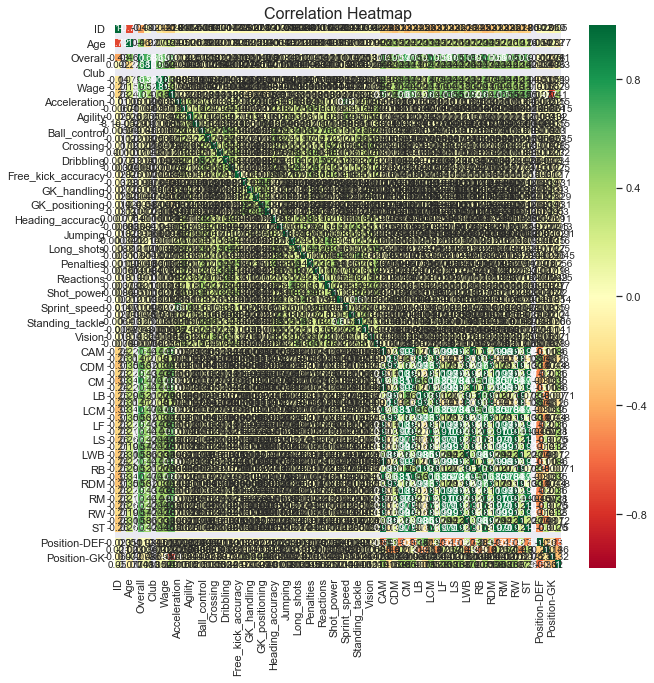

In [114]:
##Finding correlations
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
corr = players_data.cor().as_data_frame()
corr.index = players_data.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [6]:
##Data split
player_split = players_data.split_frame(ratios = [0.8], seed = 1234)
player_train = player_split[0] # using 80% for training
player_test = player_split[1] #rest 20% for testing
print(player_train.shape, player_test.shape)

(14457, 74) (3524, 74)


In [7]:
##Defining predictor Variables
predictors = list(players_data.columns) 
predictors.remove('Wage')  # Since we need to predict Wage
predictors.remove('ID')
predictors

['Name',
 'Age',
 'Nationality',
 'Overall',
 'Potential',
 'Club',
 'Value',
 'Special',
 'Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'Ball_control',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Free_kick_accuracy',
 'GK_diving',
 'GK_handling',
 'GK_kicking',
 'GK_positioning',
 'GK_reflexes',
 'Heading_accuracy',
 'Interceptions',
 'Jumping',
 'Long_passing',
 'Long_shots',
 'Marking',
 'Penalties',
 'Positioning',
 'Reactions',
 'Short_passing',
 'Shot_power',
 'Sliding_tackle',
 'Sprint_speed',
 'Stamina',
 'Standing_tackle',
 'Strength',
 'Vision',
 'Volleys',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'RAM',
 'RB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST',
 'Position',
 'Position-DEF',
 'Position-FWD',
 'Position-GK',
 'Position-MID']

In [119]:
# Import the function for GLM
from h2o.estimators.glm import H2OGeneralizedLinearEstimator# Set up GLM for regression
glm = H2OGeneralizedLinearEstimator(family = 'gaussian', model_id = 'glm_default')# Use .train() to build the model
glm.train(x = predictors, 
                  y = 'Wage', 
                  training_frame = player_train)
print(glm)

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_default


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 529135183.64921325
RMSE: 23002.93858725909
MAE: 11994.602729810445
RMSLE: 1.8779417583562916
R^2: 0.003991807972193562
Mean Residual Deviance: 529135183.64921325
Null degrees of freedom: 14456
Residual degrees of freedom: 14426
Null deviance: 7680365895829.012
Residual deviance: 7649707350016.676
AIC: 331485.39859645034
Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2019-11-04 10:03:34,0.000 sec,0,7680365895829.0117188,531255855.0065029


In [120]:
##testing the model with test data
glm.model_performance(player_test)


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 536332652.48681414
RMSE: 23158.85689076242
MAE: 11945.905457941977
RMSLE: 1.9455719645892144
R^2: 0.003796021056491017
Mean Residual Deviance: 536332652.48681414
Null degrees of freedom: 3523
Residual degrees of freedom: 3493
Null deviance: 1897359449616.004
Residual deviance: 1890036267363.533
AIC: 80898.01315949476


In [122]:
predictions = glm.predict(player_test)
predictions.head(5)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict
11986.8
11881.2
11927.8
11717.3
11620.2


### Predictions using H2o.ai AutoML

In [8]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models = 20, max_runtime_secs=1000, seed = 1)

In [9]:
aml.train(x=predictors, y='Wage', training_frame=player_train, validation_frame=player_test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [10]:
print(aml.leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_1_AutoML_20191104_110057,2.97528e+07,5454.62,2.97528e+07,2102.53,nan
GBM_2_AutoML_20191104_110057,3.5536e+07,5961.21,3.5536e+07,2153.76,nan
GBM_grid_1_AutoML_20191104_110057_model_1,3.62129e+07,6017.71,3.62129e+07,2362.75,nan
GBM_3_AutoML_20191104_110057,3.63037e+07,6025.25,3.63037e+07,2163.41,nan
GBM_grid_1_AutoML_20191104_110057_model_2,3.66413e+07,6053.2,3.66413e+07,2278.96,nan
GBM_4_AutoML_20191104_110057,3.68016e+07,6066.43,3.68016e+07,2180.29,nan
GBM_grid_1_AutoML_20191104_110057_model_4,4.69022e+07,6848.52,4.69022e+07,2776.39,nan
DRF_1_AutoML_20191104_110057,5.18999e+07,7204.16,5.18999e+07,2853.69,0.977587
GBM_grid_1_AutoML_20191104_110057_model_3,5.58609e+07,7474.01,5.58609e+07,3131.06,nan
GBM_5_AutoML_20191104_110057,7.38649e+07,8594.47,7.38649e+07,2582.3,nan


In [13]:
##Predictions
preds = aml.leader.predict(player_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [15]:
h2o.shutdown()

[WARNING] in <ipython-input-15-1edf85295eae> line 1:
    >>> h2o.shutdown()
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
H2O session _sid_847b closed.
